In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# new ones!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Read Data 
ames_train = pd.read_csv('datasets/train.csv')
ames_test = pd.read_csv('datasets/test.csv')

In [3]:
ames_train['Total_Full_Bath'] = ames_train['Total_Full_Bath'].fillna(0)

In [4]:
final_features = ['Overall Qual', 'Square Footage', 'Total_Full_Bath', 'Total Bedrooms', 'Garage Area', 'Garage Cars', 'Year Remod/Add']

X= ames_train[final_features]
y= ames_train['SalePrice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=22)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print(cross_val_score(lr, X_train, y_train).mean())
lr.score(X_train, y_train), lr.score(X_test, y_test)

0.7675621192067889


(0.7773766131406701, 0.8210629657757774)

In [10]:
# Train score
print(f'Training R-Squared Score: {lr.score(X_train, y_train)}')
# Test score
print(f'Testing R-Squared Score: {lr.score(X_test, y_test)}')

Training R-Squared Score: 0.7815931137320951
Testing R-Squared Score: 0.8128962061828148


#### 78.16% of the variability in the target variable can be attributed to the relationships captured by the model during training. The testing R-squared score being slightly higher than the training R-squared score suggests that the model is likely to be performing well. Although this also indicates there are other variables I am not accounting for in my model

Training Set Metrics:
  MSE: 1386471705.8679996
  RMSE: 37235.355589385734
  R-squared: 0.7815931137320951
Testing Set Metrics:
  MSE: 1122721165.3352263
  RMSE: 33507.03158047914
  R-squared: 0.8128962061828148


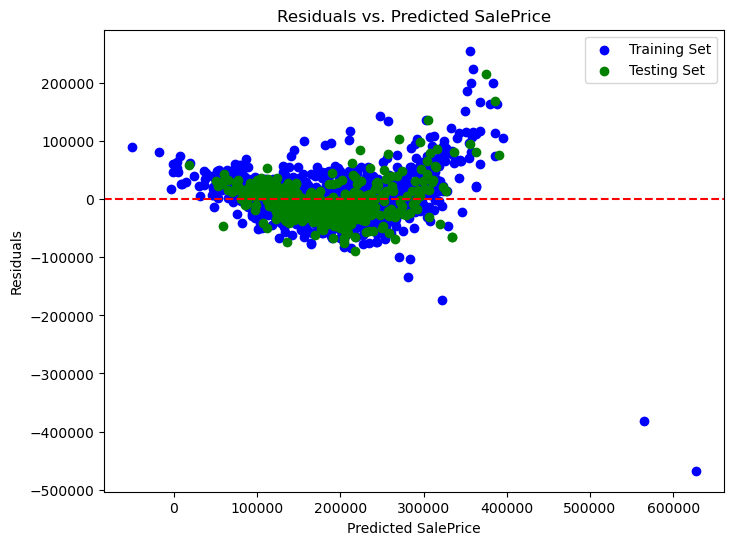

Feature Importance:
           Feature   Coefficient
0     Overall Qual  20564.324517
1   Square Footage     31.942620
2  Total_Full_Bath   9804.217665
3   Total Bedrooms    242.549051
4      Garage Area     37.892559
5      Garage Cars   6763.076644
6   Year Remod/Add    315.652103
Cross-Validation Scores:
[0.80612476 0.82295227 0.70682087 0.83558903 0.74555007]


In [5]:
final_features = ['Overall Qual', 'Square Footage', 'Total_Full_Bath', 'Total Bedrooms', 'Garage Area', 'Garage Cars', 'Year Remod/Add']

# Select the features and target variable
X = ames_train[final_features]
y = ames_train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Perform predictions on the training set
y_pred_train = lr.predict(X_train)

# Perform predictions on the testing set
y_pred_test = lr.predict(X_test)

# Evaluation metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = train_mse ** 0.5
train_r2 = r2_score(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_pred_test)

print("Training Set Metrics:")
print("  MSE:", train_mse)
print("  RMSE:", train_rmse)
print("  R-squared:", train_r2)

print("Testing Set Metrics:")
print("  MSE:", test_mse)
print("  RMSE:", test_rmse)
print("  R-squared:", test_r2)

# Residual analysis
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, train_residuals, c='blue', label='Training Set')
plt.scatter(y_pred_test, test_residuals, c='green', label='Testing Set')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted SalePrice')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': final_features, 'Coefficient': lr.coef_})
print("Feature Importance:")
print(feature_importance)

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)

Overall Qual stands out. For each unit increase in the overall quality rating of the house  the model predicts an increase of approximately $20,564.32 in the house price, all else being equal. Although Overall Quality can have a multitude of factors and is amiguous. Looking further it would be great to know the criteria that determiines an apprasial in Ames, Iowa which would be congruent with my problem statement of determining the best course of investment

In [27]:
final_features = ['Overall Qual', 'Square Footage', 'Total_Full_Bath', 'Total Bedrooms', 'Garage Area', 'Garage Cars', 'Year Remod/Add']


X = ames_train[final_features]
y = ames_train['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)


lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [30]:
ames_test['Square Footage'] = ames_test['1st Flr SF'] + ames_test['2nd Flr SF'] + ames_test['Low Qual Fin SF'] + ames_test['Total Bsmt SF']
ames_test['Total_Full_Bath'] = ames_test['Full Bath'] + ames_test['Bsmt Full Bath'] + ames_test['Half Bath']
ames_test['Total Bedrooms'] = ames_test['Bedroom AbvGr'] + ames_test['TotRms AbvGrd']

In [31]:
pred= lr.predict(ames_test[final_features])

In [34]:
ames_test['SalePrice']= pred

In [37]:
ames_test[['Id', 'SalePrice']].to_csv('results_test.csv', index= False)

## Conclusions

#### In conclusion, my analysis as the Data Scientist for the Ames, Iowa real estate firm has identified key indicators for making strategic investments in the market. Factors such as square footage, garage area, year of home remodeling, and the number of bedrooms and bathrooms, along with specific neighborhoods, have shown significant correlations with sale prices. Conversely, certain features such as pool area, deck square footage, and second-floor space demonstrated weak correlations. We can use this data to find possible flip opporuntities specifically looking at year home remodling, adding an additional bedroom, or deciding on the best neighboorhood 


#### While these findings offer valuable insights into our investment decisions, it is essential to consider other relevant factors to paint a complete and well-informed picture of the market landscape